In [18]:
import numpy as np
import random
from PIL import Image as im
from matplotlib import pyplot as plt
import imageio as iio

In [2]:
#Paramètres:

cote_canvas = 64 #Taille du coté du canvas
matrice_modele1 = np.full((cote_canvas, cote_canvas), 1)
matrice_modele2 = np.full((cote_canvas, cote_canvas), 2)
canvas = np.zeros((cote_canvas, cote_canvas), dtype=np.uint8)

#Pour les listes:
ind_nb_agents = 0
ind_tecp = 1 #Temps entre chaque pixel
ind_nb_correct_chance = 2 #Pourcentage de chance de placer un bon pixel
ind_couleur = 3


In [3]:
def plot_show(canvas, i):
    """sauvergarde un png du canvas dans le dossier images."""
    image = np.zeros((cote_canvas, cote_canvas, 3), dtype=np.uint8)
    color = {0: [255, 255, 255], 1: [255, 0, 0], 2: [0, 255, 0]}
    image[canvas == 0] = color[0]
    image[canvas == 1] = color[1]
    image[canvas == 2] = color[2]
    img = im.fromarray(image)
    img.save(f"images/{i}.png")

In [4]:
g1 = [100, 5, 0.9, 1]
g2 = [200, 7, 0.5, 2]
#Un groupe est composé dans l'ordre d'un nombre d'agents, un tecp, une correct chance compris entre 0 et 1, et une couleur.
    

In [5]:
def creer_dict_bon_mauvais_pixel(canvas, matrice_modele1, matrice_modele2):
    """Ajoute dans un dictionnaire les pixels bons dans bon_pixel et les mauvais dans mauvais_pixel.
    Les bons pixels sont les pixels qui doivent être remplacés sur le canvas, et les mauvais sont ceux qui ne doivent pas être touchés"""
    remplacer_pixel_g1 = []
    pas_toucher_pixel_g1 = []
    remplacer_pixel_g2 = []
    pas_toucher_pixel_g2 = []
    res = {"remplacer_g1": remplacer_pixel_g1, "pas_toucher_g1": pas_toucher_pixel_g1, "remplacer_g2" : remplacer_pixel_g2, "pas_toucher_g2" : pas_toucher_pixel_g2}
    
    #Remplis le dictionnaire pour le groupe 1, remplit les listes bon_pixel_g1 et mauvais_pixel_g1
    for i in range(cote_canvas):
        for j in range(cote_canvas):
            if(canvas[i][j] != matrice_modele1[i][j]):
                res["remplacer_g1"].append((i, j))
            else:
                res["pas_toucher_g1"].append((i, j))

    #Remplis le dictionnaire pour le groupe 2, remplit les listes bon_pixel_g2 et mauvais_pixel_g2
    for i in range(cote_canvas):
        for j in range(cote_canvas):
            if(canvas[i][j] != matrice_modele2[i][j]):
                res["remplacer_g2"].append((i, j))
            else:
                res["pas_toucher_g2"].append((i, j))
    
    return res     

In [6]:

dict_bon_mauvais_pixel = creer_dict_bon_mauvais_pixel(canvas, matrice_modele1, matrice_modele2)
#dict_bon_mauvais_pixel

In [7]:
def trouve_bon_pixel_g1(dict_bon_mauvais_pixel):
    if dict_bon_mauvais_pixel["remplacer_g1"] == []:
        return None
    
    #Prendre au hasard un pixel dans la liste de ceux à remplacer.
    x = int(random.random()*len(dict_bon_mauvais_pixel["remplacer_g1"]))
    res = dict_bon_mauvais_pixel["remplacer_g1"][x]

    #On retire ce pixel de ceux à remplacer et on le mets dans ceux qu'on doit pas toucher.
    dict_bon_mauvais_pixel["remplacer_g1"].remove(res)
    dict_bon_mauvais_pixel["pas_toucher_g1"].append(res)

    #Si le pixel prit était dans ceux que le g2 ne doit pas toucher alors le mettre dans ceux à remplacer.
    if res in dict_bon_mauvais_pixel["pas_toucher_g2"]:
        dict_bon_mauvais_pixel["remplacer_g2"].append(res)
        dict_bon_mauvais_pixel["pas_toucher_g2"].remove(res)

    #Retourner le pixel
    return res

In [8]:
def trouve_mauvais_pixel_g1(dict_bon_mauvais_pixel):
    """Prendre un pixel qui est deja de la bonne couleur puis dans la simulation le repeindre de la meme couleur."""
    if dict_bon_mauvais_pixel["pas_toucher_g1"] == []:
        return None

    #On prend un pixel au hasard dans la liste de ceux qu'on doit pas toucher.
    x = int(random.random()*len(dict_bon_mauvais_pixel["pas_toucher_g1"]))
    return dict_bon_mauvais_pixel["pas_toucher_g1"][x]

In [9]:
def trouve_bon_pixel_g2(dict_bon_mauvais_pixel):
    if dict_bon_mauvais_pixel["remplacer_g2"] == []:
        return None
    
    #Prendre au hasard un pixel dans la liste de ceux à remplacer.
    x = int(random.random()*len(dict_bon_mauvais_pixel["remplacer_g2"]))
    res = dict_bon_mauvais_pixel["remplacer_g2"][x]

    #On retire ce pixel de ceux à remplacer et on le mets dans ceux qu'on doit pas toucher.
    dict_bon_mauvais_pixel["remplacer_g2"].remove(res)
    dict_bon_mauvais_pixel["pas_toucher_g2"].append(res)

    #Si le pixel prit était dans ceux que le g1 ne doit pas toucher alors le mettre dans ceux à remplacer.
    if res in dict_bon_mauvais_pixel["pas_toucher_g1"]:
        dict_bon_mauvais_pixel["remplacer_g1"].append(res)
        dict_bon_mauvais_pixel["pas_toucher_g1"].remove(res)
        
    return res

In [10]:
def trouve_mauvais_pixel_g2(dict_bon_mauvais_pixel):
    """Prendre un pixel qui est deja de la bonne couleur puis dans la simulation le repeindre de la meme couleur."""
    if dict_bon_mauvais_pixel["pas_toucher_g2"] == []:
        return None 

    #On prend un pixel au hasard dans la liste de ceux qu'on doit pas toucher.
    x = int(random.random()*len(dict_bon_mauvais_pixel["pas_toucher_g2"]))
    return dict_bon_mauvais_pixel["pas_toucher_g2"][x]


In [11]:
"""#Test:
for i in range(50):
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_mauvais_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g2(dict_bon_mauvais_pixel)
    trouve_mauvais_pixel_g2(dict_bon_mauvais_pixel)
dict_bon_mauvais_pixel"""

'#Test:\nfor i in range(50):\n    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)\n    trouve_mauvais_pixel_g1(dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g2(dict_bon_mauvais_pixel)\n    trouve_mauvais_pixel_g2(dict_bon_mauvais_pixel)\ndict_bon_mauvais_pixel'

In [12]:
def simulation(g1, g2, canvas, dict_bon_mauvais_pixel, i):
    """Fais affonter deux groupes"""
    nb_modifs_par_heure1 = g1[ind_nb_agents] / (g1[ind_tecp]/60)
    nb_modifs_par_heure2 = g2[ind_nb_agents] / (g2[ind_tecp]/60)
    tmp1 = nb_modifs_par_heure1
    tmp2 = nb_modifs_par_heure2
    #print(canvas)
    plot_show(canvas, i)#Enregistre le canvas a chaque étape dans le dossier images
    nb_modifs_par_heure1 = tmp1
    nb_modifs_par_heure2 = tmp2
    while((nb_modifs_par_heure1 > 0) or (nb_modifs_par_heure2 > 0)): #Tant qu'il reste des pixels à poser
        if(nb_modifs_par_heure1 > 0): #si il y a plus de pixels pour le groupe 1, on arrete de poser

            #On prend un nombre au hasard, si correct_chance est grand alors y a une grande chance que le nombre pioché au hasard soit inférieur à correct_chance donc une grande chance de poser un pixel bon.
            if (random.random() < g1[ind_nb_correct_chance]): #placer un bon pixel.
                pixel = trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
                if (pixel != None):
                    x, y = pixel
                    canvas[x][y] = g1[ind_couleur]
                    nb_modifs_par_heure1-=1
                
            else: #Place un mauvais pixel
                pixel = trouve_mauvais_pixel_g1(dict_bon_mauvais_pixel)
                if (pixel != None):
                    x, y = pixel
                    canvas[x][y] = g1[ind_couleur]
                    nb_modifs_par_heure1-=1
            
        if(nb_modifs_par_heure2 > 0): #Pareil pour groupe 2
                
            if (random.random() < g2[ind_nb_correct_chance]):
                pixel = trouve_bon_pixel_g2(dict_bon_mauvais_pixel)
                if (pixel != None):
                        x2, y2= pixel
                        canvas[x2][y2] = g2[ind_couleur]
                        nb_modifs_par_heure2-=1
                
            else:
                pixel = trouve_mauvais_pixel_g2(dict_bon_mauvais_pixel)
                if (pixel != None):
                    x2, y2 = pixel
                    canvas[x2][y2] = g2[ind_couleur]
                    nb_modifs_par_heure2-=1



In [13]:
#simulation(g1, g2, matrice_modele1, matrice_modele2, canvas, 24, creer_dict_bon_mauvais_pixel(canvas, matrice_modele1, matrice_modele2,))

In [14]:
def taux_completion(canvas, matrice_modele):
    return np.sum(canvas == matrice_modele) / (cote_canvas*cote_canvas)

In [15]:
#mat = np.full((cote_canvas, cote_canvas), 1)
#taux_completion(canvas, mat)

[0.0, 0.179931640625, 0.308837890625, 0.355224609375, 0.36181640625, 0.327392578125, 0.27734375, 0.237548828125, 0.176025390625, 0.1181640625, 0.056884765625, 0.068603515625, 0.06689453125, 0.0703125, 0.06982421875, 0.0703125, 0.0673828125, 0.062744140625, 0.066650390625, 0.06787109375, 0.06787109375, 0.068115234375, 0.072998046875, 0.071533203125]


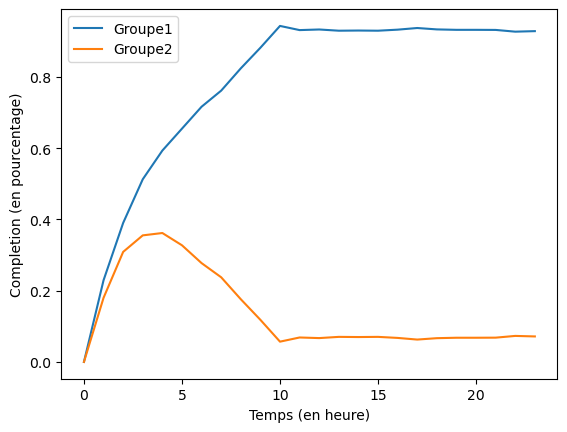

In [16]:
l1 = []
l2 = []
for i in range(24): #On lance la simulation pour une journée.(24h)
    """Lance la simulation 24 fois, et on ajouter le taux de completion a chaque boucle dans une liste"""
    l1.append(taux_completion(canvas, matrice_modele1))
    l2.append(taux_completion(canvas, matrice_modele2))
    simulation(g1, g2, canvas, dict_bon_mauvais_pixel, i)

#Affiche d'un graphique du taux de completion en fontion du temps du groupe 1 et 2
x = [i for i in range(24)]
y1 = l1
y2 = l2
print(y2)
plt.plot(x, y1, label = "Groupe1")
plt.plot(x, y2, label = "Groupe2")
plt.xlabel("Temps (en heure)")
plt.ylabel("Completion (en pourcentage)")
plt.legend()

In [17]:
#Création du gif:

frames = np.stack([iio.imread(f"images/{i}.png") for i in range(24)], axis = 0)
iio.mimwrite('rplace.gif', frames)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13396\354753499.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = np.stack([iio.imread(f"images/{i}.png") for i in range(24)], axis = 0)
